<a href="https://colab.research.google.com/github/alvinnoza-ph/viz-kalimantan-wildfires/blob/master/Preprocessing_Kalimantan_Wildfires_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis on Kalimantan's Active Fires as Observed by VIIRS in 2021 (Part 1: Data Preprocessing)**

## 1. Data Preprocessing

### 1.1 Import Libraries and Load Datasets

In this section, the first thing we need to do is to install and import all required libraries for this project, such as standard libraries and geopandas.

In [1]:
## import standard libraries
import numpy as np
import pandas as pd
import math
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
## install tqdm
!pip install tqdm
from tqdm import tqdm

In [3]:
## install dan import geopandas 
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

     |████████████████████████████████| 1.0 MB 18.3 MB/s 
     |████████████████████████████████| 6.3 MB 52.7 MB/s 
     |████████████████████████████████| 16.7 MB 48.9 MB/s 


We installed geopy to get location from reverse geolocation method since in our main dataset later contains only latitude and longitude.

In [4]:
!pip install geopy
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='latlongconvert')

To load datasets, I need to connect this notebook to my google drive since I store my datasets in there.

In [5]:
## connect notebook ke google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


This project using a dataset that contain active fires as observed by the Visible Infrared Imaging Radiometer Suite (VIIRS) between January 1 and December 31, 2021. The VIIRS instrument flies on the Joint Polar Satellite System’s Suomi-NPP and NOAA-20 polar-orbiting satellites. Instruments on polar orbiting satellites typically observe a wildfire at a given location a few times a day as they orbit the Earth from pole to pole. VIIRS detects hot spots at a resolution of 375 meters per pixel, which means it can detect smaller, lower temperature fires than other fire-observing satellites. Its observations are about three times more detailed than those from the MODIS instrument, for example. VIIRS also provides nighttime fire detection capabilities through its Day-Night Band, which can measure low-intensity visible light emitted by small and fledgling fires.

In [6]:
## load main dataset
viirs = pd.read_csv("/content/gdrive/MyDrive/wildfires/viirs-snpp_2021_Indonesia.csv", sep=",")

viirs.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,-1.454696,127.433228,341.71,0.66,0.73,2021-01-01,400,N,VIIRS,n,1,287.14,9.83,D,3
1,-3.989202,122.100601,338.51,0.50,0.49,2021-01-01,542,N,VIIRS,n,1,289.81,4.83,D,0
2,-2.577868,121.379036,350.77,0.47,0.48,2021-01-01,542,N,VIIRS,n,1,285.65,35.66,D,2
3,0.487806,122.279358,333.05,0.60,0.53,2021-01-01,542,N,VIIRS,n,1,290.58,5.19,D,0
4,-1.373236,121.310432,335.93,0.48,0.48,2021-01-01,542,N,VIIRS,n,1,290.65,5.30,D,0


In [7]:
viirs.shape

(65484, 15)

The second dataset contains Indonesia administrative boundaries that come 
Ministry of Village, Development of Disadvantaged Regions
And Transmigration (Kemendesa) website. We need to use geopandas to load the dataset since it's come with shp format. 

In [8]:
# load second dataset
batas_adm = gpd.read_file("/content/gdrive/MyDrive/batas-administrasi/BATAS DESA 2017 KEMENDES.shp")

batas_adm.head()

,FID,PROVNO,KABKOTNO,KECNO,DESANO,PROVINSI,KABKOT,KECAMATAN,DESA,IDDESA,...,DESKEL unt,DESKEL u_1,DESKEL u_2,DESKEL u_3,DESKEL u_4,DESKEL u_5,DESKEL u_6,DESKEL u_7,DESKEL u_8,geometry
0,0.0,11,01,010,001,ACEH,SIMEULUE,TEUPAH SELATAN,LATIUNG,1101010001,...,1.109072e+09,ACEH,11,SIMEULUE,1109,TEUPAH SELATAN,110907,LATIUNG,DESA,"POLYGON Z ((96.45392 2.38830 0.00000, 96.45387..."
1,1.0,11,01,010,002,ACEH,SIMEULUE,TEUPAH SELATAN,LABUHAN BAJAU,1101010002,...,1.109072e+09,ACEH,11,SIMEULUE,1109,TEUPAH SELATAN,110907,LABUHAN BAJAU,DESA,"POLYGON Z ((96.48288 2.39323 0.00000, 96.48371..."
2,2.0,11,01,010,003,ACEH,SIMEULUE,TEUPAH SELATAN,SUAK LAMATAN,1101010003,...,1.109072e+09,ACEH,11,SIMEULUE,1109,TEUPAH SELATAN,110907,SUAK LAMATAN,DESA,"POLYGON Z ((96.37323 2.34240 0.00000, 96.37324..."
3,3.0,11,01,010,004,ACEH,SIMEULUE,TEUPAH SELATAN,ANA AO,1101010004,...,1.109072e+09,ACEH,11,SIMEULUE,1109,TEUPAH SELATAN,110907,ANA AO,DESA,"POLYGON Z ((96.47117 2.44947 0.00000, 96.47124..."
4,4.0,11,01,010,005,ACEH,SIMEULUE,TEUPAH SELATAN,LATALING,1101010005,...,1.109072e+09,ACEH,11,SIMEULUE,1109,TEUPAH SELATAN,110907,LATALING,DESA,"POLYGON Z ((96.47117 2.44947 0.00000, 96.46327..."


In [9]:
batas_adm.shape

(81912, 22)

### 1.2 Datasets Exploration

#### Dataset Description

#### Columns Description

### 1.3 Data Preparation

In [10]:
viirs.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type
0,-1.454696,127.433228,341.71,0.66,0.73,2021-01-01,400,N,VIIRS,n,1,287.14,9.83,D,3
1,-3.989202,122.100601,338.51,0.50,0.49,2021-01-01,542,N,VIIRS,n,1,289.81,4.83,D,0
2,-2.577868,121.379036,350.77,0.47,0.48,2021-01-01,542,N,VIIRS,n,1,285.65,35.66,D,2
3,0.487806,122.279358,333.05,0.60,0.53,2021-01-01,542,N,VIIRS,n,1,290.58,5.19,D,0
4,-1.373236,121.310432,335.93,0.48,0.48,2021-01-01,542,N,VIIRS,n,1,290.65,5.30,D,0


Our dataset contains active fires from a whole area in Indonesia. Since this project only focus on active fires in Kalimantan, it means we need to filter our data. The easiest way to do this is by using reverse geolocation with geopy library. We just need to pass the latitude and longitude active fires value and then they will return the detail of the location name.

In [11]:
coord = str(viirs["latitude"][10])+","+str(viirs["longitude"][10])

start = time.time()
search = geolocator.reverse(coord)
print(search)
end = time.time()
print(end-start)


Togola Sanger, Halmahera Barat, Maluku Utara, Indonesia
0.3615093231201172


Unfortunately, we can't use geopy's reverse geolocation for our dataset since it's need API request for using it. Our dataset had 65484 active fires while for every request we need almost 1 second to get the detail location of the active fires, it means we need 65000ish second to complete get the detail location of active fires. I tried a few approach to reduce the number of the combination latitudes and longitudes, such as rouded the decimal values. But turn out i's only return unaccurate location, and I get timed-out since request to many points.

That's why we need the second dataset. We will use geopandas function to check if the Points from main dataset it's located in one of villages in Kalimantan or no. If it's true, we'll take the rows of the matched criteria.

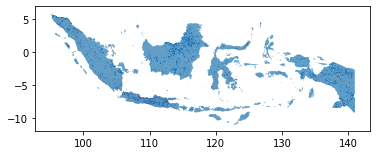

In [12]:
## plot the dataset
batas_adm = batas_adm.set_geometry("geometry")
batas_adm.plot()

We will only take required columns for our project, and then filter the values with five province that Kalimantan had (Kalimantan Utara, Kalimantan Selatan, Kalimantan Barat, Kalimantan Timur, Kalimantan Tengah).

In [14]:
batas_adm.head(2)

,FID,PROVNO,KABKOTNO,KECNO,DESANO,PROVINSI,KABKOT,KECAMATAN,DESA,IDDESA,...,DESKEL unt,DESKEL u_1,DESKEL u_2,DESKEL u_3,DESKEL u_4,DESKEL u_5,DESKEL u_6,DESKEL u_7,DESKEL u_8,geometry
0,0.0,11,01,010,001,ACEH,SIMEULUE,TEUPAH SELATAN,LATIUNG,1101010001,...,1.109072e+09,ACEH,11,SIMEULUE,1109,TEUPAH SELATAN,110907,LATIUNG,DESA,"POLYGON Z ((96.45392 2.38830 0.00000, 96.45387..."
1,1.0,11,01,010,002,ACEH,SIMEULUE,TEUPAH SELATAN,LABUHAN BAJAU,1101010002,...,1.109072e+09,ACEH,11,SIMEULUE,1109,TEUPAH SELATAN,110907,LABUHAN BAJAU,DESA,"POLYGON Z ((96.48288 2.39323 0.00000, 96.48371..."


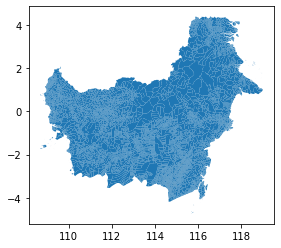

In [15]:
## take only required columns
batas_adm = batas_adm[["PROVINSI", "KABKOT", "KECAMATAN", "DESA", "geometry"]]

## set filter
kalimantan = batas_adm["PROVINSI"].str.contains("KALIMANTAN")

## apply filter to new dataset
adm_kal = batas_adm[kalimantan].reset_index(drop=True)

## capitalize the first character of each word

adm_kal["PROVINSI"] = adm_kal["PROVINSI"].str.title()
adm_kal["KABKOT"] = adm_kal["KABKOT"].str.title()
adm_kal["KECAMATAN"] = adm_kal["KECAMATAN"].str.title()
adm_kal["DESA"] = adm_kal["DESA"].str.title()

## plot filtered dataset
adm_kal.plot()

In [ ]:
## check for shape
adm_kal.shape

(7228, 5)

In [16]:
adm_kal.head()

,PROVINSI,KABKOT,KECAMATAN,DESA,geometry
0,Kalimantan Barat,Sambas,Selakau,Semelagi Besar,"POLYGON Z ((109.03036 0.99017 0.00000, 109.029..."
1,Kalimantan Barat,Sambas,Selakau,Sungai Daun,"POLYGON Z ((109.03856 1.01587 0.00000, 109.038..."
2,Kalimantan Barat,Sambas,Selakau,Sungai Rusa,"POLYGON Z ((108.99806 1.03721 0.00000, 108.999..."
3,Kalimantan Barat,Sambas,Selakau,Pangkalan Bemban,"POLYGON Z ((109.01340 1.05720 0.00000, 109.021..."
4,Kalimantan Barat,Sambas,Selakau,Sungai Nyirih,"POLYGON Z ((108.96720 1.06516 0.00000, 108.967..."


In [39]:
## export to csv and save it to drive
adm_kal.to_csv("/content/gdrive/MyDrive/wildfires/kalimantan-adm.csv", index=False)

There's 7228 village that located in Kalimantan. We will use this dataset to check every single Points in our main dataset.

In [17]:
## check for one pair latitude and longitude
latlong = Point(viirs["latitude"][0], viirs["longitude"][0])
areas = adm_kal["geometry"][0]

print("is {:f} and {:f}".format(viirs["latitude"][6], viirs["longitude"][6])+" within kalimantan?: ", latlong.within(areas))

is -2.159446 and 115.582207 within kalimantan?:  False


We can define a function that could help us to filter which points of observed active fires that located in Kalimantan.

In [18]:
def is_kalimantan(long, lat):
    
    """
    This funtion will check if longitude and latitude from one hotspot is within an kalimantan administration area or no.
    If the longitude and latitude is within kalimantan administration, the function will return values from math row.
    """
    
    ## set long lat into a point
    coord = Point(long, lat)

    ## put entire rows from geometry column into a list so the loop will faster than search through basic loop
    list_geo = adm_kal["geometry"].tolist()

    list_prov = adm_kal["PROVINSI"].tolist()
    list_city = adm_kal["KABKOT"].tolist()
    list_dist = adm_kal["KECAMATAN"].tolist()
    
    province = [] ## if coord true within kalimantan, return the province from the matched row
    city = [] ## if coord true within kalimantan, return the city (kabkot) from the matched row
    district = [] ## if coord true within kalimantan, return the district (kecamatan) from matched row
    geo_list = [] ## if coord true within kalimantan, return the boundary from matched row

    count = 0
    for i in list_geo:
        if coord.within(i):
            result1 = list_prov[count]
            result2 = list_city[count]
            result3 = list_dist[count]
            result4 = i

            province.append(result1)
            city.append(result2)
            district.append(result3)
            geo_list.append(result4)
            break    ## brak the loop if the coordinate already match in one area
        else:
             count+=1

    if province:
        return province[0], city[0], district[0], geo_list[0] ## rather than return a list, just return the value from the list
    else:
        return None, None, None, None ## just return none to the unmatch coordinates

In [19]:
## test function
longi = viirs["longitude"][0]
lat = viirs["latitude"][0]
start = time.time()
search = is_kalimantan(longi, lat)
print(search)
end = time.time()
print(end-start)

(None, None, None, None)
0.0425419807434082


Try to apply the function to 1000 rows of records and see how long it will take to finish 1000 loops.

In [24]:
## take sample from main dataset
df_sample = viirs[:1000]
df_sample.shape

(1000, 15)

In [25]:
## apply the function
## loop through dict
%%time

df_dict = df_sample.to_dict("records")

province = []
city = []
district = []
geo_list = []

for row in tqdm(df_dict):
    ## set parameter
    lat = row["latitude"]
    long = row["longitude"]

    ## call function
    search = is_kalimantan(long, lat)
    result1 = search[0]
    result2 = search[1]
    result3 = search[2]
    result4 = search[3]

    ## append to list
    province.append(result1)
    city.append(result2)
    district.append(result3)
    geo_list.append(result4)

df_sample["province"] = province
df_sample["city"] = city
df_sample["district"] = district
df_sample["boundary"] = geo_list

100%|██████████| 1000/1000 [00:37<00:00, 26.96it/s]

CPU times: user 36.5 s, sys: 322 ms, total: 36.8 s
Wall time: 37.1 s


In [26]:
df_sample.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,province,city,district,boundary
0,-1.454696,127.433228,341.71,0.66,0.73,2021-01-01,400,N,VIIRS,n,1,287.14,9.83,D,3,None,None,None,None
1,-3.989202,122.100601,338.51,0.50,0.49,2021-01-01,542,N,VIIRS,n,1,289.81,4.83,D,0,None,None,None,None
2,-2.577868,121.379036,350.77,0.47,0.48,2021-01-01,542,N,VIIRS,n,1,285.65,35.66,D,2,None,None,None,None
3,0.487806,122.279358,333.05,0.60,0.53,2021-01-01,542,N,VIIRS,n,1,290.58,5.19,D,0,None,None,None,None
4,-1.373236,121.310432,335.93,0.48,0.48,2021-01-01,542,N,VIIRS,n,1,290.65,5.30,D,0,None,None,None,None


In [27]:
## drop none values since it means the coordinates it's not within kalimantan
df_sample = df_sample.dropna().reset_index(drop=True)

df_sample.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,province,city,district,boundary
0,-2.159446,115.582207,328.70,0.39,0.36,2021-01-01,542,N,VIIRS,n,1,286.21,2.28,D,2,Kalimantan Selatan,Tabalong,Upau,POLYGON Z ((115.5886395980001 -2.1662300429999...
1,0.633645,117.544212,300.13,0.33,0.55,2021-01-02,1806,N,VIIRS,n,1,275.48,0.84,N,2,Kalimantan Timur,Kutai Timur,Sangatta Utara,POLYGON Z ((117.6590002800001 0.59211592300005...
2,0.633128,117.547409,299.15,0.33,0.55,2021-01-02,1806,N,VIIRS,n,1,276.20,0.71,N,2,Kalimantan Timur,Kutai Timur,Sangatta Utara,POLYGON Z ((117.6590002800001 0.59211592300005...
3,-0.253213,115.667465,349.44,0.33,0.56,2021-01-03,506,N,VIIRS,n,1,282.03,5.78,D,0,Kalimantan Timur,Kutai Barat,Barong Tongkok,POLYGON Z ((115.72651310200001 -0.211835656999...
4,-0.224093,109.574730,330.18,0.46,0.47,2021-01-04,630,N,VIIRS,n,1,287.51,1.63,D,0,Kalimantan Barat,Kubu Raya,Sungai Raya,POLYGON Z ((109.69810422600005 -0.305648588999...


In [29]:
df_sample.shape

(101, 19)

It takes about 37 seconds to be able to complete checking 1000 points, which means every second we get results for 27 points. We will need approximately 40 minutes to be able to complete the entire checking of 65484 points. It still faster rather than 65000ish second, right?

In [30]:
## copy main dataset
viirs1 = viirs.copy()

viirs1.shape

(65484, 15)

In [31]:
## apply the function
## loop through dict
%%time

df_dict = viirs1.to_dict("records")

province = []
city = []
district = []
geo_list = []

for row in tqdm(df_dict):
    ## set parameter
    lat = row["latitude"]
    long = row["longitude"]

    ## call function
    search = is_kalimantan(long, lat)
    result1 = search[0]
    result2 = search[1]
    result3 = search[2]
    result4 = search[3]

    ## append to list
    province.append(result1)
    city.append(result2)
    district.append(result3)
    geo_list.append(result4)

viirs1["province"] = province
viirs1["city"] = city
viirs1["district"] = district
viirs1["boundary"] = geo_list

100%|██████████| 65484/65484 [37:46<00:00, 28.89it/s]


CPU times: user 37min 10s, sys: 19 s, total: 37min 29s
Wall time: 37min 47s


In [32]:
viirs1.shape

(65484, 19)

In [33]:
## drop none values since it means the fires it's not within kalimantan
viirs1.dropna(inplace=True)

viirs1 = viirs1.reset_index(drop=True)

viirs1.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,province,city,district,boundary
0,-2.159446,115.582207,328.70,0.39,0.36,2021-01-01,542,N,VIIRS,n,1,286.21,2.28,D,2,Kalimantan Selatan,Tabalong,Upau,POLYGON Z ((115.5886395980001 -2.1662300429999...
1,0.633645,117.544212,300.13,0.33,0.55,2021-01-02,1806,N,VIIRS,n,1,275.48,0.84,N,2,Kalimantan Timur,Kutai Timur,Sangatta Utara,POLYGON Z ((117.6590002800001 0.59211592300005...
2,0.633128,117.547409,299.15,0.33,0.55,2021-01-02,1806,N,VIIRS,n,1,276.20,0.71,N,2,Kalimantan Timur,Kutai Timur,Sangatta Utara,POLYGON Z ((117.6590002800001 0.59211592300005...
3,-0.253213,115.667465,349.44,0.33,0.56,2021-01-03,506,N,VIIRS,n,1,282.03,5.78,D,0,Kalimantan Timur,Kutai Barat,Barong Tongkok,POLYGON Z ((115.72651310200001 -0.211835656999...
4,-0.224093,109.574730,330.18,0.46,0.47,2021-01-04,630,N,VIIRS,n,1,287.51,1.63,D,0,Kalimantan Barat,Kubu Raya,Sungai Raya,POLYGON Z ((109.69810422600005 -0.305648588999...


In [34]:
viirs1.shape

(17347, 19)

In [35]:
viirs1["acq_date"] = viirs1["acq_date"].astype("datetime64[ns]")

viirs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17347 entries, 0 to 17346
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   latitude    17347 non-null  float64       
 1   longitude   17347 non-null  float64       
 2   bright_ti4  17347 non-null  float64       
 3   scan        17347 non-null  float64       
 4   track       17347 non-null  float64       
 5   acq_date    17347 non-null  datetime64[ns]
 6   acq_time    17347 non-null  int64         
 7   satellite   17347 non-null  object        
 8   instrument  17347 non-null  object        
 9   confidence  17347 non-null  object        
 10  version     17347 non-null  int64         
 11  bright_ti5  17347 non-null  float64       
 12  frp         17347 non-null  float64       
 13  daynight    17347 non-null  object        
 14  type        17347 non-null  int64         
 15  province    17347 non-null  object        
 16  city        17347 non-

Cool, now we have filtered dataset that contains active fires that located only in Kalimantan. There's 17347 active fires observed day and night in the entire 2021. We will export this dataset to csv so we can use it for visualization.

In [36]:
## export to csv and save it to drive
viirs1.to_csv("/content/gdrive/MyDrive/wildfires/filtered-kalimantan-active-fires.csv", index=False)

In [38]:
## load preprocessed dataset
df = pd.read_csv("/content/gdrive/MyDrive/wildfires/filtered-kalimantan-active-fires.csv")

df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight,type,province,city,district,boundary
0,-2.159446,115.582207,328.70,0.39,0.36,2021-01-01,542,N,VIIRS,n,1,286.21,2.28,D,2,Kalimantan Selatan,Tabalong,Upau,POLYGON Z ((115.5886395980001 -2.1662300429999...
1,0.633645,117.544212,300.13,0.33,0.55,2021-01-02,1806,N,VIIRS,n,1,275.48,0.84,N,2,Kalimantan Timur,Kutai Timur,Sangatta Utara,POLYGON Z ((117.6590002800001 0.59211592300005...
2,0.633128,117.547409,299.15,0.33,0.55,2021-01-02,1806,N,VIIRS,n,1,276.20,0.71,N,2,Kalimantan Timur,Kutai Timur,Sangatta Utara,POLYGON Z ((117.6590002800001 0.59211592300005...
3,-0.253213,115.667465,349.44,0.33,0.56,2021-01-03,506,N,VIIRS,n,1,282.03,5.78,D,0,Kalimantan Timur,Kutai Barat,Barong Tongkok,POLYGON Z ((115.72651310200001 -0.211835656999...
4,-0.224093,109.574730,330.18,0.46,0.47,2021-01-04,630,N,VIIRS,n,1,287.51,1.63,D,0,Kalimantan Barat,Kubu Raya,Sungai Raya,POLYGON Z ((109.69810422600005 -0.305648588999...


Great! after we preprocessed our dataset, in the next notebook we will try to visualize it so we can gain insight from it.